In [7]:
import requests
import json 
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo 
import os

url = "https://www.stackoverflow.com"
response = requests.get(url)

In [2]:
response

<Response [200]>

In [3]:
response.status_code

200

In [4]:
print(response.text)


<!DOCTYPE html>


    <html class="html__responsive " lang="en">

    <head>

        <title>Stack Overflow - Where Developers Learn, Share, &amp; Build Careers</title>
        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196">
        <link rel="apple-touch-icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a">
        <link rel="image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a"> 
        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">
        <meta name="description" content="Stack Overflow is the largest, most trusted online community for developers to learn, share&#x200B; &#x200B;their programming &#x200B;knowledge, and build their careers."/>
    <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0">
        <me

In [2]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="html__responsive" lang="en">
 <head>
  <title>
   Stack Overflow - Where Developers Learn, Share, &amp; Build Careers
  </title>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
  <link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
  <meta content="Stack Overflow is the largest, most trusted online community for developers to learn, share​ ​their programming ​knowledge, and build their careers." name="description"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
  <meta content="noarchive" name="bingbot"/>
  <meta content="website" p

In [1]:
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.data.historical import CryptoHistoricalDataClient  # Import the CryptoHistoricalDataClient

# No keys required for crypto data
client = CryptoHistoricalDataClient()
# Creating request object
request_params = CryptoBarsRequest(
  symbol_or_symbols=["BTC/USD"],
  timeframe=TimeFrame.Day,
  start="2022-09-01",
  end="2024-08-05"
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
def plot_data(df, title):
    plt.style.use('seaborn-v0_8')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    df['close'].plot()
    plt.show()

In [ ]:
for key, value in os.environ.items():
    if key.startswith('APCA'):
        print(f"{key}={value}") 

In [2]:
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.data.historical import StockHistoricalDataClient
import os 
from matplotlib import pyplot as plt
from datetime import datetime 

# Create today's date
today = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")

# Set up Alpaca API keys
api_key_id = os.getenv('APCA_API_KEY')
api_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Create a client for stock historical data
client = StockHistoricalDataClient(api_key=api_key_id, 
                                   secret_key=api_secret_key)

# Creating request object for stock data
request_params = StockBarsRequest(
  symbol_or_symbols=["AAPL"],
  timeframe=TimeFrame.Day,
  start="1980-09-01T00:00:00",
  adjustment='split',
  end=today
)

# Fetch the data
response = client.get_stock_bars(request_params)

# Print the response
print(response)

ImportError: cannot import name 'BaseModel' from 'pydantic' (unknown location)

In [3]:
response.df

NameError: name 'response' is not defined

In [10]:
import alpaca_trade_api as tradeapi
import pandas as pd
import os
from datetime import datetime 

# Alpaca API credentials
API_KEY = os.getenv('APCA_API_KEY')
SECRET_KEY = os.getenv('APCA_API_SECRET_KEY')
BASE_URL = 'https://paper-api.alpaca.markets'

# Initialize Alpaca API
api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL, api_version='v2')
today = datetime.now().strftime("%Y-%m-%d")

# Define the stock ticker and the time frame
ticker = 'AAPL'
start_date = '1990-01-01'  # Start date in 'YYYY-MM-DD' format
end_date = '2024-08-23'   # End date in 'YYYY-MM-DD' format
timeframe = '1D'           # Supported time frames: '1Min', '5Min', '15Min', '1H', '1D'

# Fetch historical data
df_stock = api.get_bars(ticker, timeframe, start=start_date, end=end_date,
                        adjustment='split').df

# Display the data
display(df_stock.head())
df_stock.tail()

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2016-01-04 05:00:00+00:00,26.34,26.34,25.50,351452,25.65,287741356,26.02
2016-01-05 05:00:00+00:00,25.68,26.46,25.60,321365,26.44,234762144,25.85
2016-01-06 05:00:00+00:00,25.18,25.59,24.97,409164,25.14,284319308,25.21
2016-01-07 05:00:00+00:00,24.11,25.03,24.11,462836,24.67,343985812,24.50
2016-01-08 05:00:00+00:00,24.24,24.78,24.19,419555,24.64,300265168,24.47


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2024-08-19 04:00:00+00:00,225.89,225.99,223.04,606363,225.7200,40687813,224.857880
2024-08-20 04:00:00+00:00,226.51,227.17,225.45,498797,225.7700,30299033,226.529891
2024-08-21 04:00:00+00:00,226.40,227.98,225.05,506656,226.5200,34765480,226.446066
2024-08-22 04:00:00+00:00,224.53,228.34,223.90,586190,227.7900,43695321,225.477920
2024-08-23 04:00:00+00:00,226.84,228.22,224.33,555154,225.6589,38677250,226.580704


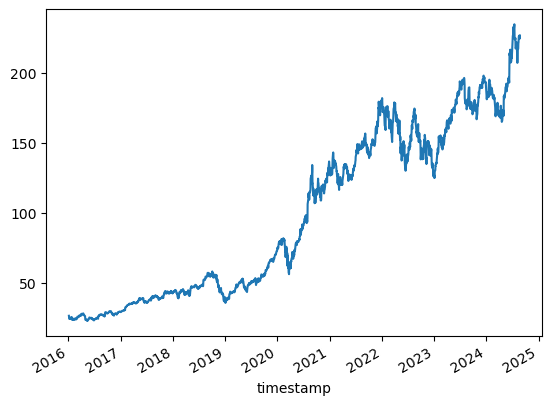

In [8]:
df_stock['close'].plot();

In [42]:
import yfinance as yf
import pandas as pd
import datetime as datetime 
import matplotlib.pyplot as plt

In [38]:
# Create a function to fetch the stock data based on the ticker
def get_stock_data(ticker, years=1):
    start_date=(datetime.datetime.today() - datetime.timedelta(days=365*years)).strftime('%Y-%m-%d')
    end_date=datetime.datetime.today().strftime('%Y-%m-%d')
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [45]:
df_apple = get_stock_data('AAPL', years=20)
df_apple

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-31,0.608393,0.624107,0.607143,0.615893,0.520106,376560800
2004-09-01,0.612500,0.642679,0.610536,0.640357,0.540766,515726400
2004-09-02,0.633929,0.639464,0.621964,0.636786,0.537750,406324800
2004-09-03,0.625179,0.641429,0.625179,0.629107,0.531265,293468000
2004-09-07,0.632143,0.646250,0.629107,0.638571,0.539257,301957600
...,...,...,...,...,...,...
2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800
2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000
2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500


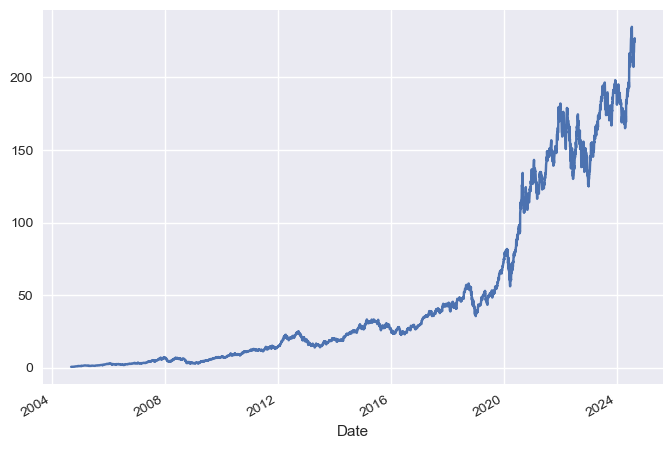

In [46]:
plt.style.use('seaborn-v0_8')
df_apple['Close'].plot();

In [3]:
df_apple = response.df
df_apple.reset_index(inplace=True)
df_apple.set_index('timestamp', inplace=True)
df_apple.tail()

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2024-08-19 04:00:00+00:00,AAPL,225.7200,225.99,223.04,225.89,40687813.0,606363.0,224.857880
2024-08-20 04:00:00+00:00,AAPL,225.7700,227.17,225.45,226.51,30299033.0,498797.0,226.529891
2024-08-21 04:00:00+00:00,AAPL,226.5200,227.98,225.05,226.40,34765480.0,506656.0,226.446066
2024-08-22 04:00:00+00:00,AAPL,227.7900,228.34,223.90,224.53,43695321.0,586190.0,225.477920
2024-08-23 04:00:00+00:00,AAPL,225.6589,228.22,224.33,226.84,38677250.0,555154.0,226.580704


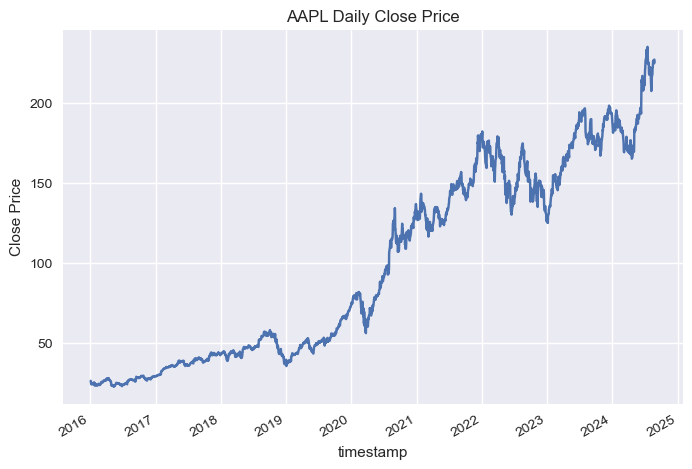

In [6]:
plot_data(df=df_apple, title='AAPL Daily Close Price')

In [8]:
data = [go.Scatter(x=df_apple.index, 
                   y=df_apple['close'],
                   mode='lines',
                   marker=dict(color='steelblue'))]
layout = go.Layout(title='APPLE Daily Close Price',
                   title_x=0.5,
                   xaxis_title='Date',
                   yaxis_title='Close Price',
                   hovermode='closest')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [9]:
import plotly.graph_objs as go
import pandas as pd

# Sample DataFrame (assuming df_apple is already defined and contains the necessary data)
# For demonstration purposes, let's create a sample DataFrame
data = {
    'date': pd.date_range(start='2022-09-01', end='2023-09-01', freq='B'),
    'close': pd.Series(range(100, 100 + len(pd.date_range(start='2022-09-01', end='2023-09-01', freq='B'))))
}
# df_apple = pd.DataFrame(data)
# df_apple.set_index('close', inplace=True)

# Define significant events
annotations = [
    dict(
        x='2022-09-07',  # Example date
        y=df_apple.loc['2022-09-07', 'close'],
        xref='x',
        yref='y',
        text='Event 1: New iPhone Release',
        showarrow=True,
        arrowhead=2,
        ax=-50,
        ay=-50
    ),
    dict(
        x='2023-01-27',  # Example date
        y=df_apple.loc['2023-01-27', 'close'],
        xref='x',
        yref='y',
        text='Event 2: Quarterly Earnings',
        showarrow=True,
        arrowhead=2,
        ax=-50,
        ay=-50
    )
]

data = [go.Scatter(x=df_apple.index, 
                   y=df_apple['close'],
                   mode='lines',
                   marker=dict(color='steelblue'))]

layout = go.Layout(
    title=dict(
        text='APPLE Daily Close Price',
        x=0.5,
        font=dict(size=24)  # Make the title larger
    ),
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode='closest',
    annotations=annotations  # Add annotations to the layout
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [10]:
df_apple

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,AAPL,25.6500,26.34,25.50,26.34,287741356.0,351452.0,26.020000
2016-01-05 05:00:00+00:00,AAPL,26.4400,26.46,25.60,25.68,234762144.0,321365.0,25.850000
2016-01-06 05:00:00+00:00,AAPL,25.1400,25.59,24.97,25.18,284319308.0,409164.0,25.210000
2016-01-07 05:00:00+00:00,AAPL,24.6700,25.03,24.11,24.11,343985812.0,462836.0,24.500000
2016-01-08 05:00:00+00:00,AAPL,24.6400,24.78,24.19,24.24,300265168.0,419555.0,24.470000
...,...,...,...,...,...,...,...,...
2024-08-19 04:00:00+00:00,AAPL,225.7200,225.99,223.04,225.89,40687813.0,606363.0,224.857880
2024-08-20 04:00:00+00:00,AAPL,225.7700,227.17,225.45,226.51,30299033.0,498797.0,226.529891
2024-08-21 04:00:00+00:00,AAPL,226.5200,227.98,225.05,226.40,34765480.0,506656.0,226.446066


In [1]:
import dash 
from dash import dcc, html, Input, Output, dash_table 
import plotly.express as px
import pandas as pd 
import json
import plotly.graph_objects as go 
import sys 
import base64
from numpy import random

sys.path.append('../')

import omdutils as omd

In [2]:
sql = 'SELECT * FROM cars'
db = '../SourceData/datasets.db'
df = omd.from_sqlite(sql, db) 
# Add a random "jitter" to model_year to spread out the plot
df['year'] = random.randint(-4,5,len(df))*0.10 + df['model_year']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,year
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,70.2
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,69.7
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,70.4
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,70.2
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,69.9


In [3]:
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='mpg_scatter',
        figure={
            'data': [go.Scatter(
                x = df['year']+1900,  # our "jittered" data
                y = df['mpg'],
                text = df['name'],
                hoverinfo = 'text',
                mode = 'markers'
            )],
            'layout': go.Layout(
                title = 'mpg.csv dataset',
                xaxis = {'title': 'model year'},
                yaxis = {'title': 'miles per gallon'},
                hovermode='closest'
            )
        }
    )
])

if __name__ == '__main__':
    app.run_server()

nodename nor servname provided, or not known


AttributeError: 'tuple' object has no attribute 'tb_frame'

--- 

# Economic Calendar

---

## 1. Get Economic Events from Alpha Vantage

In [11]:
from FedTools import MonetaryPolicyCommittee

# Create an instance of the MonetaryPolicyCommittee class
monetary_policy = MonetaryPolicyCommittee()

# Get the FOMC meeting statements
dataset = monetary_policy.find_statements()

# Display the dataset
print(dataset)

ModuleNotFoundError: No module named 'FedTools'

In [29]:
df = pd.DataFrame(dataset)
df['Date'] = pd.to_datetime(df.index)
df.head()
df.head().to_csv('fomc_statements.csv', index=False)

In [34]:
import pyfedwatch as fw
from pyfedwatch.datareader import read_price_history, get_fedfunds_range
from pyfedwatch.datareader import read_fomc_data, get_fomc_data

## FedWatch 
sources: 
* https://www.cmegroup.com/education/videos/introduction-to-cme-fedwatch.html 
* https://github.com/ARahimiQuant/pyfedwatch/blob/master/notebooks/00-pyfedwatch-user-guide.ipynb 

In [36]:
# Get FOMC meetings data
fomc_data_2 = get_fomc_data()
fomc_dates_2 = fomc_data_2[(fomc_data_2['Status'] == 'Scheduled') | (fomc_data_2['Status'] == 'Cancelled')].index.tolist()

In [42]:
# Fed meetings
fomc_dates_2[356:-16]

['2024-01-31',
 '2024-03-20',
 '2024-05-01',
 '2024-06-12',
 '2024-07-31',
 '2024-09-18',
 '2024-11-07',
 '2024-12-18']

In [43]:
# Get Fed Funds target rate upper and lower limits
ff_range = get_fedfunds_range()
ff_range

/Users/oliverdreger/opt/anaconda3/envs/ml2024v2/lib/python3.10/site-packages/pyfedwatch/datareader.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ff_range['DFEDTARL'].fillna(ff_range['DFEDTAR'], inplace=True)
/Users/oliverdreger/opt/anaconda3/envs/ml2024v2/lib/python3.10/site-packages/pyfedwatch/datareader.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becau

,LL,UL
Date,,
1982-09-27,10.25,10.25
1982-09-28,10.25,10.25
1982-09-29,10.25,10.25
1982-09-30,10.25,10.25
1982-10-01,10.00,10.00
...,...,...
2024-08-18,5.25,5.50
2024-08-19,5.25,5.50
2024-08-20,5.25,5.50


In [48]:
# Testing FOMC class
fomc = fw.fomc.FOMC(watch_date = '2023-03-10',
                    fomc_dates = fomc_dates_2,
                    num_upcoming = 16)

fomc.summary

,Contract,Meeting,Order
YYYY-MM,,,
2023-01,ZQF23,No FOMC,0
2023-02,ZQG23,2023-02-01,-1
2023-03,ZQH23,2023-03-22,1
2023-04,ZQJ23,No FOMC,0
2023-05,ZQK23,2023-05-03,2
2023-06,ZQM23,2023-06-14,3
2023-07,ZQN23,2023-07-26,4
2023-08,ZQQ23,No FOMC,0
2023-09,ZQU23,2023-09-20,5


In [50]:
dash.__version__

'2.17.1'

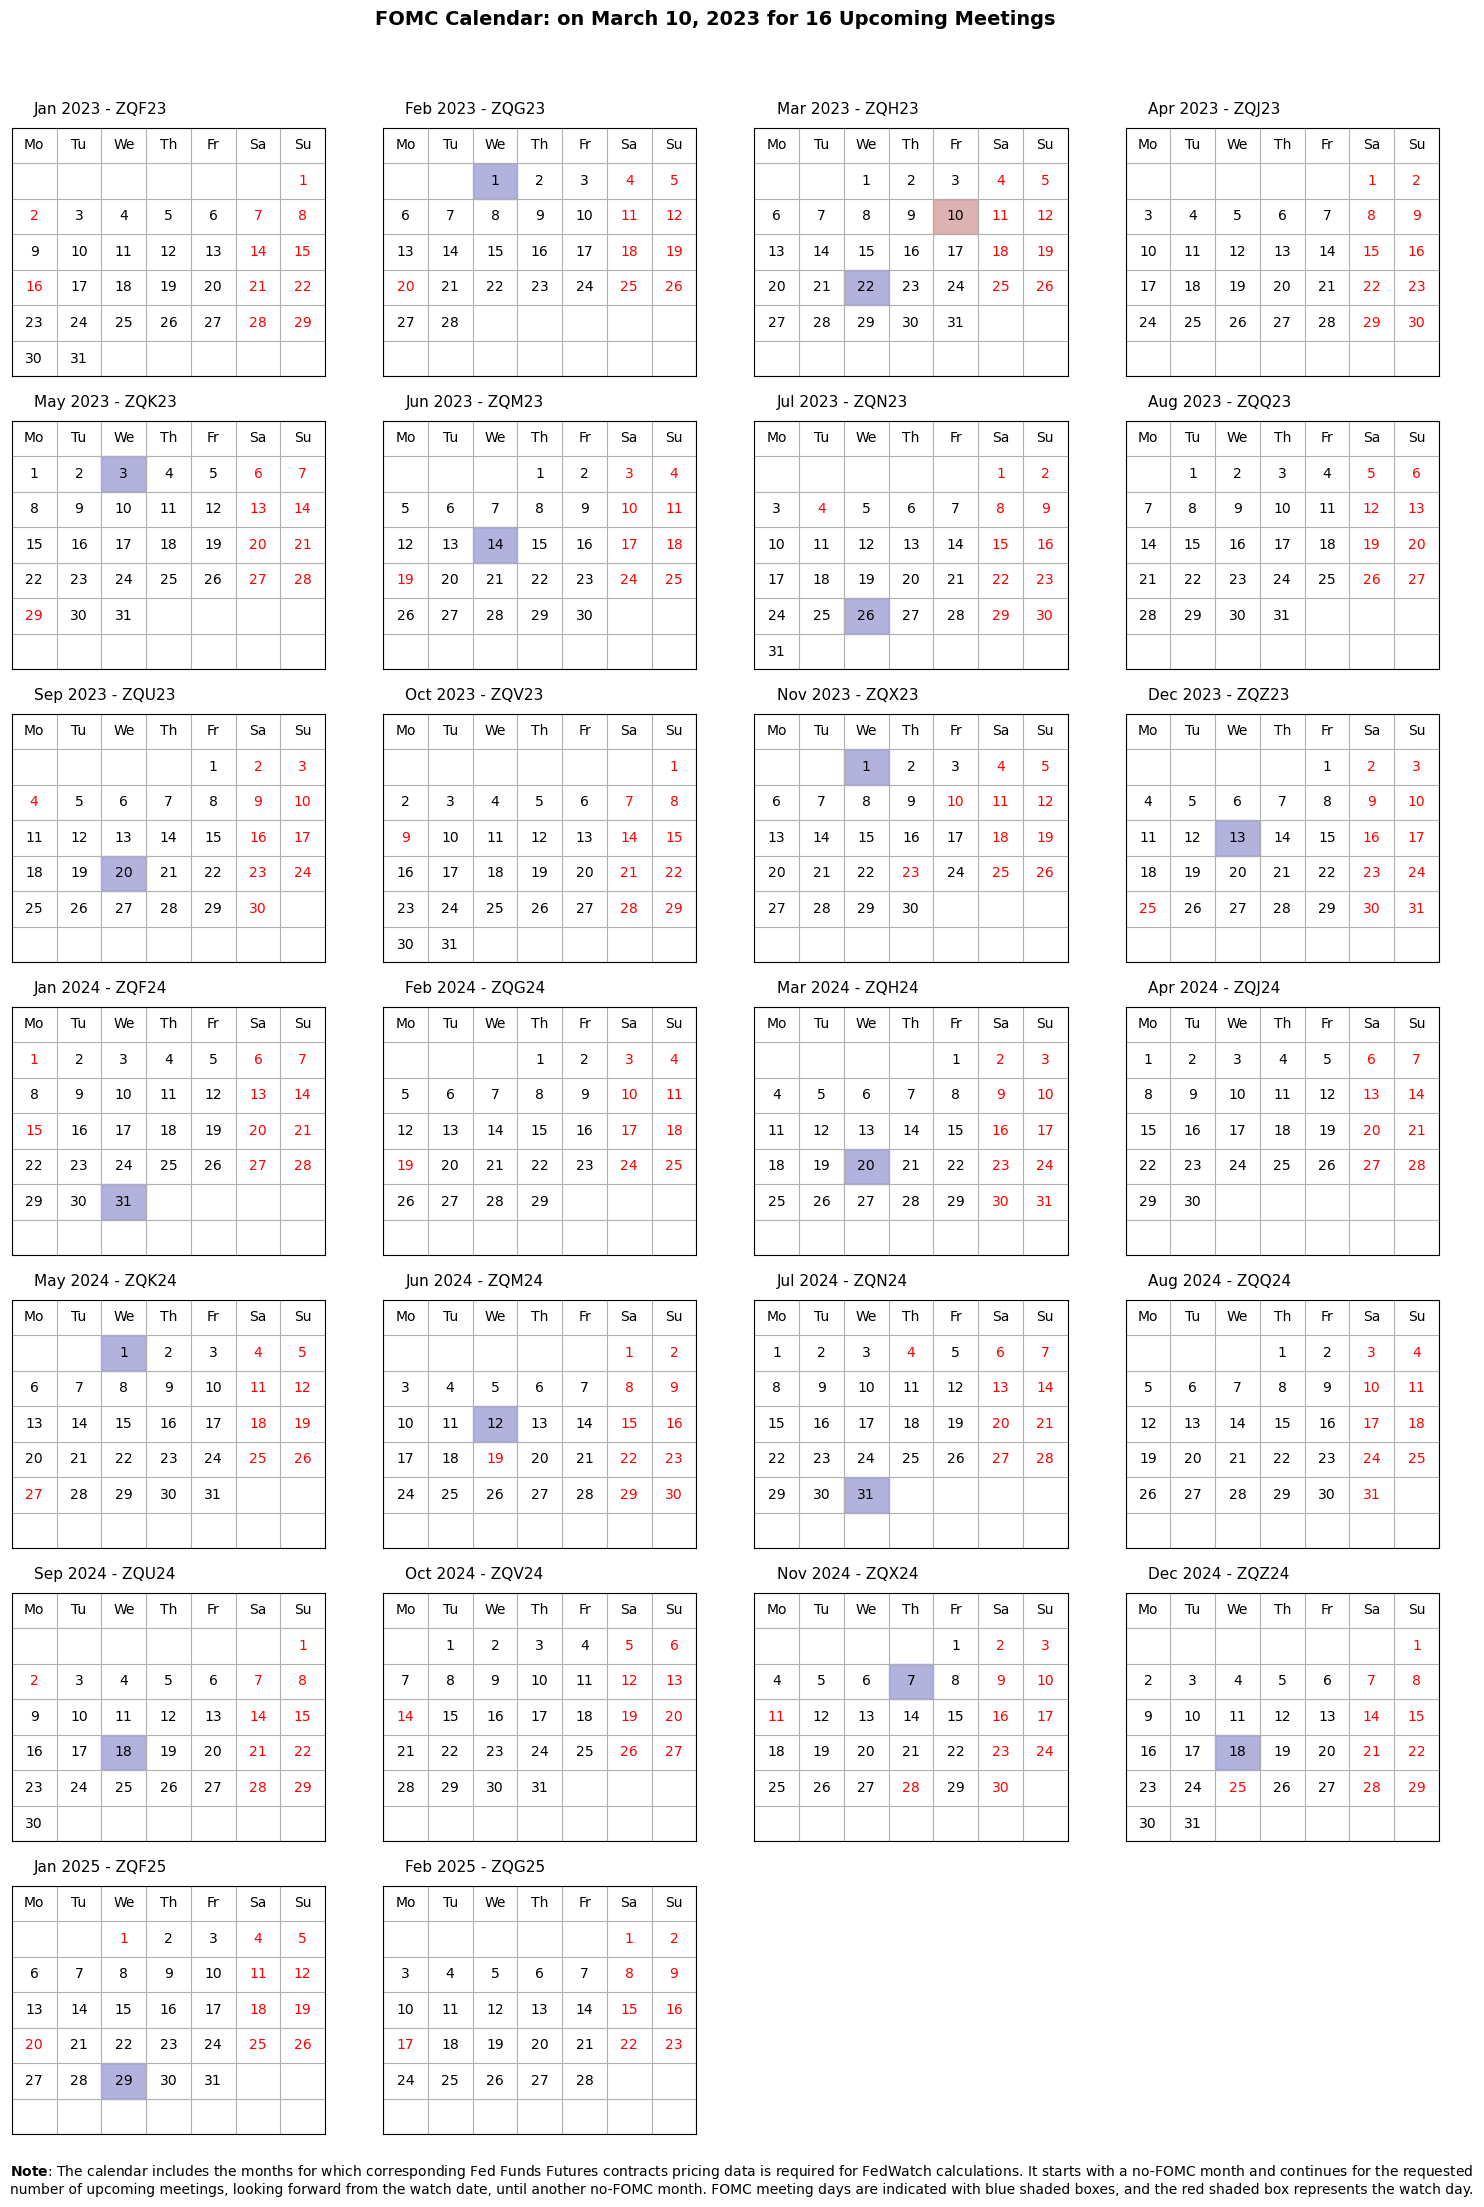

In [49]:
# Plot FOMC calendar
fig = fomc.plot_fomc_calendar()

In [2]:
from openbb import obb

ImportError: cannot import name 'AliasGenerator' from 'pydantic' (/Users/oliverdreger/opt/anaconda3/envs/ml2024v3/lib/python3.10/site-packages/pydantic/__init__.py)

In [4]:
from openbb import obb
import pandas as pd 
import datetime
import os 
from matplotlib import pyplot as plt

pd.options.display.max_columns = None
biz_token_api_key = os.getenv('X_RAPID_API_KEY')
open_bb_api_key = os.getenv('OPEN_BB_API_KEY')
openbb.account.login(pat=open_bb_api_key)
openbb.account.save()

# Get the price of a stock
quote_data = obb.equity.price.quote(symbol="AAPL", provider="yfinance")
quote_data.to_dataframe()

ImportError: cannot import name 'AliasGenerator' from 'pydantic' (/Users/oliverdreger/opt/anaconda3/envs/ml2024v3/lib/python3.10/site-packages/pydantic/__init__.py)

In [5]:
openbb.account.login(pat=open_bb_api_key)
openbb.account.save()
obb.equity.price.historical(symbol="AAPL", provider="yfinance").to_df()

NameError: name 'openbb' is not defined

In [22]:
obb.equity.price.performance(symbol="AAPL").to_dataframe()

/Users/oliverdreger/opt/anaconda3/envs/ml2024v3/lib/python3.10/site-packages/finvizfinance/screener/base.py:131: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame(frame)], ignore_index=True)


,symbol,one_day,one_week,one_month,three_month,six_month,ytd,one_year,volatility_week,volatility_month,price,volume,average_volume,relative_volume,analyst_score
0,AAPL,-0.0083,-0.0008,0.0274,0.1762,0.2178,0.1662,0.2669,0.0136,0.0243,224.53,43695320.0,64590000.0,0.66,1.89


In [26]:
all_companies = obb.equity.search("", provider="sec")
all_companies.to_dataframe()

,symbol,name,cik
0,AAPL,Apple Inc.,320193
1,MSFT,MICROSOFT CORP,789019
2,NVDA,NVIDIA CORP,1045810
3,GOOGL,Alphabet Inc.,1652044
4,AMZN,AMAZON COM INC,1018724
...,...,...,...
10160,OCSAW,Oculis Holding AG,1953530
10161,AITRU,AI Transportation Acquisition Corp,1966734
10162,AITRR,AI Transportation Acquisition Corp,1966734
10163,BAYAR,Bayview Acquisition Corp,1969475


In [27]:
obb.regulators.sec.institutions_search("Berkshire Hathaway").to_df()

,name,cik
0,BERKSHIRE HATHAWAY ENERGY CO,0001081316
1,BERKSHIRE HATHAWAY FINANCE CORP,0001274791
2,BERKSHIRE HATHAWAY HOMESTATE INSURANCE CO.,0000829771
3,BERKSHIRE HATHAWAY INC /DE/,0000109694
4,BERKSHIRE HATHAWAY INC/DE,0000109694
5,BERKSHIRE HATHAWAY INC,0001067983
6,BERKSHIRE HATHAWAY LIFE INSURANCE CO OF NEBRASKA,0001015867
7,LMZ & BERKSHIRE HATHAWAY CO,0001652795


In [28]:
df_daily = obb.equity.price.historical(symbol = "spy", provider="yfinance")
df_daily.to_df().head(1)

,open,high,low,close,volume,split_ratio,dividend,capital_gains
date,,,,,,,,
2023-08-23,439.25,443.670013,439.100006,443.029999,68441000,0.0,0.0,0.0


In [48]:
df_daily =(
  obb.equity.price.historical(symbol = "MTB", start_date = "1990-01-01", provider="yfinance")
  .to_df()
)
display(df_daily.head(1))
display(df_daily.tail(1))

,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
1990-03-05,6.4,6.4,6.4,6.4,0,0.0,0.0


,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
2024-08-23,165.839996,170.880005,165.470001,168.679993,891000,0.0,0.0


In [46]:
company = obb.equity.search("MTB", provider="sec").to_dataframe()
company

,symbol,name,cik
0,MTB,M&T BANK CORP,36270
1,AMTB,Amerant Bancorp Inc.,1734342
2,MTBLY,"Moatable, Inc.",1509223
3,MTB-PJ,M&T BANK CORP,36270
4,MTB-PH,M&T BANK CORP,36270


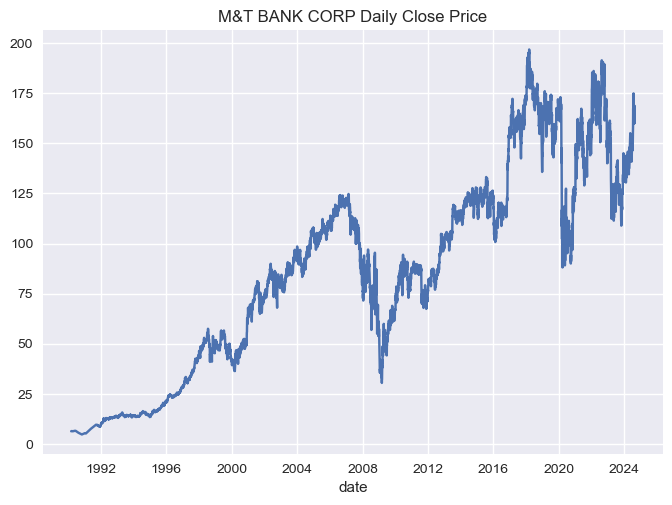

In [47]:
plt.style.use('seaborn-v0_8')
df_daily['close'].plot(title=f'{company["name"].values[0]} Daily Close Price');

In [1]:
import requests
import pandas as pd

def get_economic_events(api_key, start_date, end_date):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "ECONOMIC_EVENTS",
        "apikey": api_key,
        "start_date": start_date,
        "end_date": end_date
    }
    response = requests.get(url, params=params)
    data = response.json()

    events = []
    for event in data['economic_event_data']:
        events.append({
            "date": event['timestamp'],
            "event_name": event['event_name'],
            "actual": event.get('actual'),
            "forecast": event.get('forecast'),
            "previous": event.get('previous')
        })
    
    return pd.DataFrame(events)

In [2]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import os 


# Function to get economic events
def get_economic_events(api_key, start_date, end_date):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "ECONOMIC_EVENTS",
        "apikey": api_key,
        "start_date": start_date,
        "end_date": end_date
    }
    response = requests.get(url, params=params)
    data = response.json()

    events = []
    for event in data['economic_event_data']:
        events.append({
            "date": event['timestamp'],
            "event_name": event['event_name'],
            "actual": event.get('actual'),
            "forecast": event.get('forecast'),
            "previous": event.get('previous')
        })
    
    return pd.DataFrame(events)

# Set your Alpha Vantage API key
api_key = os.getenv('ALPHAVANTAGE_API_KEY')

# Fetch economic events data
df_events = get_economic_events(api_key, "2024-01-01", "2024-12-31")

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Economic Events Dashboard"), width=12)
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='event-dropdown',
                options=[{'label': event, 'value': event} for event in df_events['event_name'].unique()],
                multi=True,
                placeholder="Select Economic Events"
            )
        ], width=12)
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='events-plot')
        ], width=12)
    ])
])

# Define callback to update the graph based on the selected events
@app.callback(
    Output('events-plot', 'figure'),
    [Input('event-dropdown', 'value')]
)
def update_graph(selected_events):
    if selected_events:
        filtered_df = df_events[df_events['event_name'].isin(selected_events)]
    else:
        filtered_df = df_events
    
    fig = px.scatter(
        filtered_df,
        x="date",
        y="actual",
        color="event_name",
        hover_data=["forecast", "previous"],
        title="Economic Events Over Time"
    )
    
    return fig

app.run_server(debug=True)

KeyError: 'economic_event_data'

In [3]:
import requests
import pandas as pd

def get_economic_events(api_key, start_date, end_date):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "ECONOMIC_EVENTS",
        "apikey": api_key,
        "start_date": start_date,
        "end_date": end_date
    }
    response = requests.get(url, params=params)
    
    # Print the response content for debugging
    print(response.json())
    
    # Check if the response contains the expected data
    data = response.json()
    if 'economic_event_data' not in data:
        raise ValueError("The API response does not contain 'economic_event_data'. Please check the API key, request limits, or response format.")
    
    events = []
    for event in data['economic_event_data']:
        events.append({
            "date": event['timestamp'],
            "event_name": event['event_name'],
            "actual": event.get('actual'),
            "forecast": event.get('forecast'),
            "previous": event.get('previous')
        })
    
    return pd.DataFrame(events)

In [4]:
def get_economic_events(api_key, start_date, end_date):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "ECONOMIC_EVENTS",
        "apikey": api_key,
        "start_date": start_date,
        "end_date": end_date
    }
    response = requests.get(url, params=params)
    data = response.json()

    if 'economic_event_data' not in data:
        print("Error: API response does not contain 'economic_event_data'. Full response:")
        print(data)
        return pd.DataFrame()  # Return an empty DataFrame if the data is not found

    events = []
    for event in data['economic_event_data']:
        events.append({
            "date": event['timestamp'],
            "event_name": event['event_name'],
            "actual": event.get('actual'),
            "forecast": event.get('forecast'),
            "previous": event.get('previous')
        })
    
    return pd.DataFrame(events)